In [1]:
# Third party imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reload library
from importlib import reload

# Local application imports
import smile.smile; reload(smile.smile)
from smile.smile import PopulationList, Methodology, RegressionResultList, RegressionResult
import smile.example_populations; reload(smile.example_populations)
import smile.helper; reload(smile.helper)
import smile.global_params; reload(smile.global_params);

In [3]:
# Settings
seed = 3 # chosen by fair dice roll. guaranteed to be random. https://xkcd.com/221/
np.random.seed(seed)
np.set_printoptions(edgeitems=30, linewidth=100000)

# Population generation

In [4]:
pops_noerror, pops_mulerror, pops_adderror = smile.example_populations.get_useful_poplists(100)
    
pops_noerror.generate()
pops_mulerror.generate()
pops_adderror.generate()

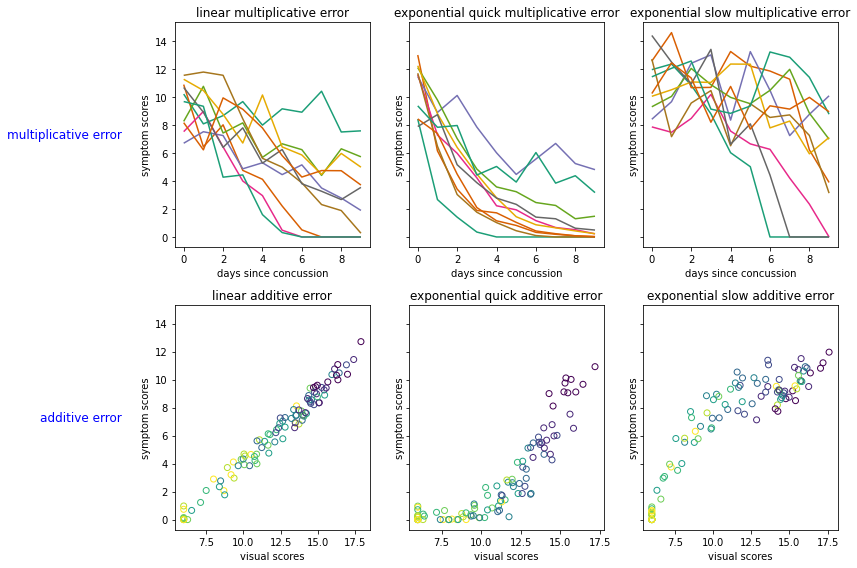

In [5]:
ncols = len(pops_noerror)
nrows = len([pops_mulerror, pops_adderror])

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharey=True)
npersons=10
ndays=10

pops_mulerror.plot(axes[0, :], x='day', y='symptom', viztype='lines', vizcolor='person', npersons=npersons, ndays=ndays)
pops_adderror.plot(axes[1, :], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()

# Study

## Comparing traditional studies

In [6]:
pops = pops_mulerror

In [7]:
methodologies = [Methodology('trad short', [8, 15, 29]), Methodology('trad long', [8, 29, 90])]

meth_pops = []
for methodology in methodologies:
    meth_pops.append(methodology.sample(pops))

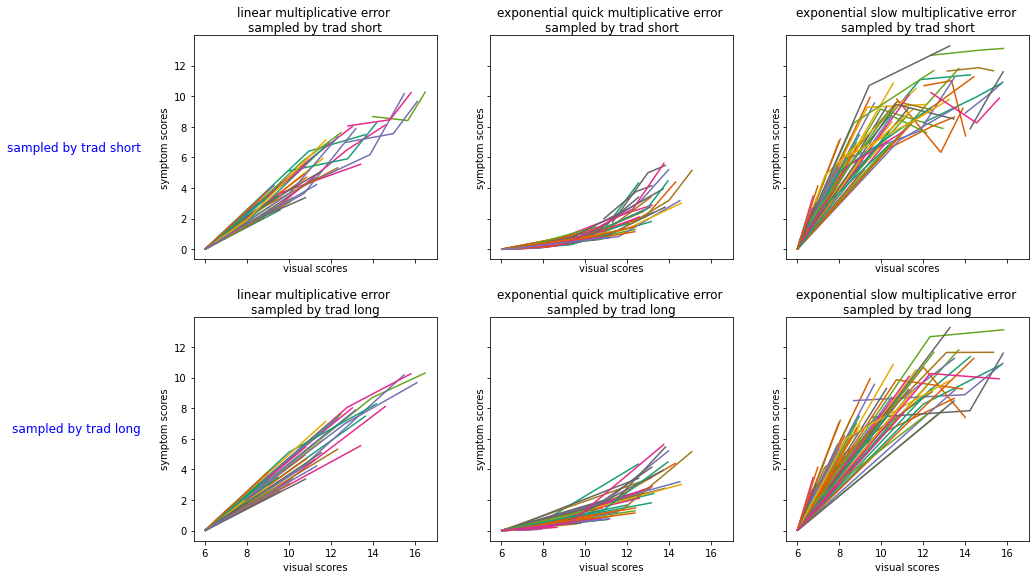

In [8]:
ncols = len(meth_pops[0])
nrows = len(meth_pops)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharex=True, sharey=True)
npersons=None
ndays=None

for row in range(nrows):
    meth_pops[row].plot(axes[row, :], x='visual', y='symptom', viztype='lines', vizcolor='person', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
fig.subplots_adjust(left=0.005, top=0.95)
plt.show()

## Comparing traditional to smile studies

In [9]:
pops = pops_adderror

In [10]:
methodologies2 = [Methodology('trad short', [8, 15, 29, 90]), Methodology('smile', [8, 0.7, 0.4, 0.1])]

meth_pops2 = []
for methodology in methodologies2:
    meth_pops2.append(methodology.sample(pops))

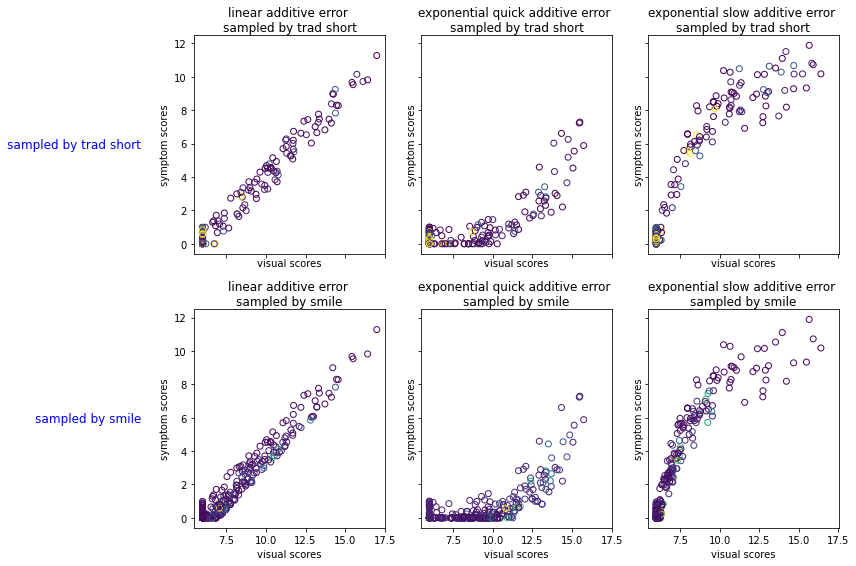

In [11]:
ncols = len(meth_pops2[0])
nrows = len(meth_pops2)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols)*2, sharex=True, sharey=True)
npersons=None
ndays=None

for row in range(nrows):
    meth_pops2[row].plot(axes[row, :], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()

## Mixed Effects Regression
(Without sampling nor filtering)

In [12]:
npersons = 100
npops = 30
#See run times in later markdown cell

pops_noerror, pops_mulerror, pops_adderror = smile.example_populations.get_useful_poplists(npersons)

pops = PopulationList([])
for i in range(npersons):
    pops.append(pops_noerror[0].copy())

pops.generate()

In [13]:
from datetime import datetime
start = datetime.now()

In [14]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    #likev = mdf.profile_re(0, 're', dist_low=0.1, dist_high=0.1)
    #https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
    
    reses = pops.regress_mixed()

In [15]:
end = datetime.now()
delta = int((end-start).total_seconds())
print("Takes {} minutes {} seconds to run for npersons={}, npops={}".format(delta//60, delta%60, npersons, npops))

Takes 24 minutes 40 seconds to run for npersons=100, npops=30


**Regression run times:**

|            | npops |   10   |   30   |   100  |
|------------|-------|--------|--------|--------|
|**npersons**|       |        |        |        |
|**10**      |       |**20 s**|**20 s**|**15 s**|
|**30**      |       |**2 m** | **2 m**| **2 m**|
|**100**     |       |**25 m**|**25 m**|**25 m**|

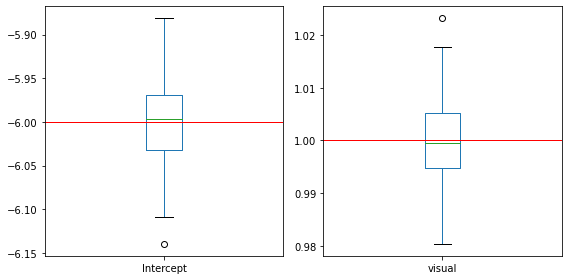

In [16]:
ncols = 2 #number of parameters, TODO
nrows = 1

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols), sharey=False, squeeze=False)

for row in range(nrows):
    slope_truth = 1
    intercept_truth = slope_truth * -smile.global_params.FMIN
    reses.plot_box(axes[row], ground_truths=[intercept_truth, slope_truth])
        
plt.tight_layout()
plt.show()

Q: Is bias evaluated on the median (the value shown in the box plot)?